In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [4]:
from proj1_helpers import *
from implementations import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


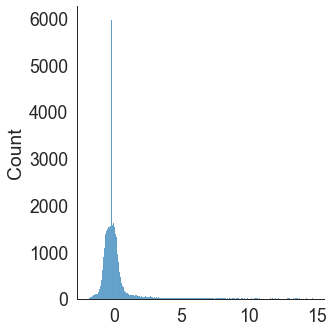

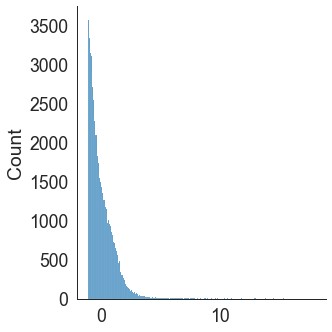

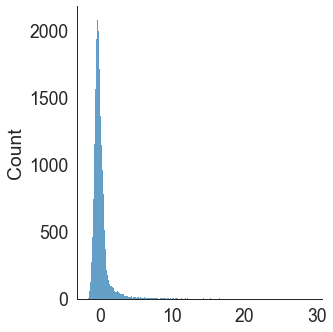

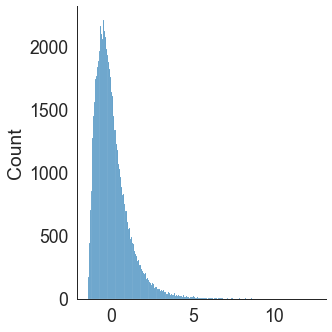

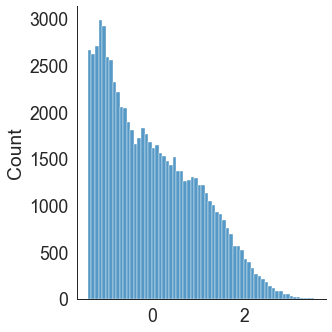

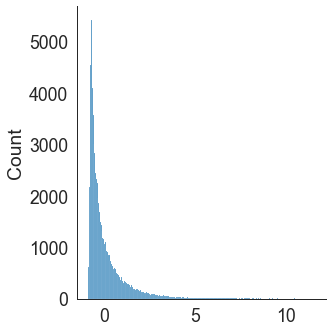

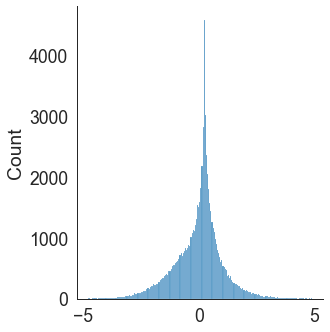

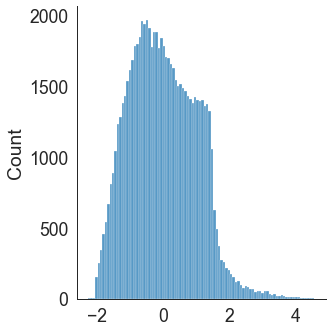

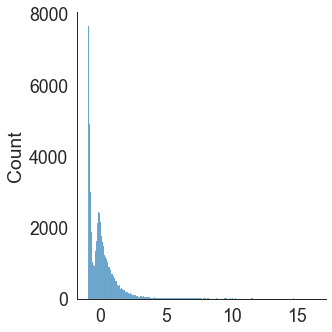

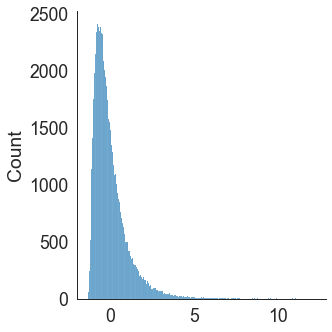

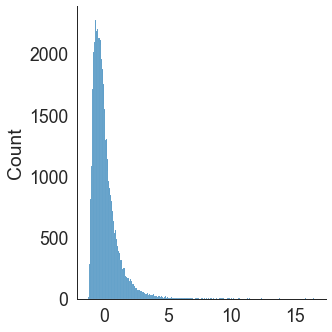

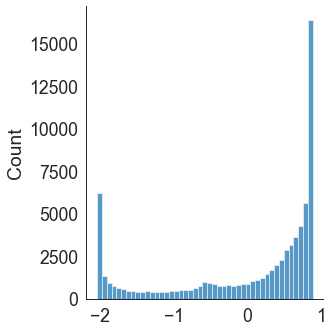

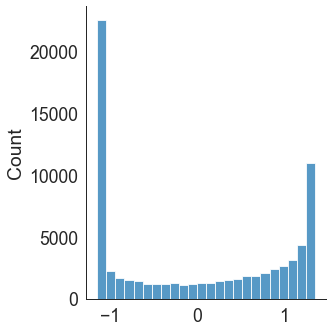

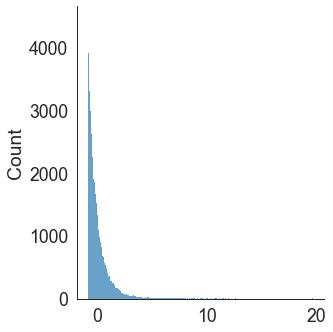

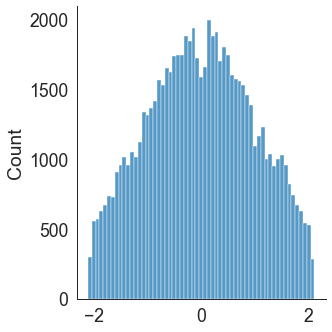

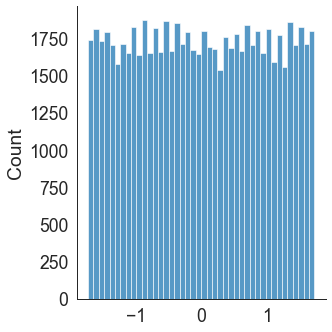

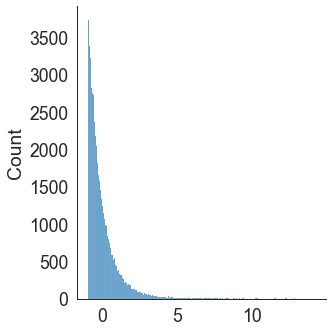

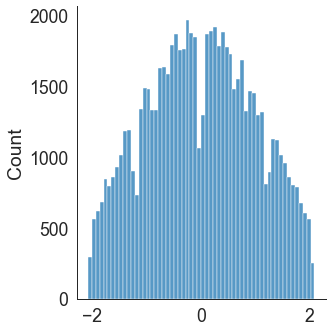

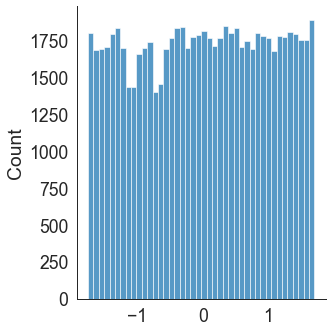

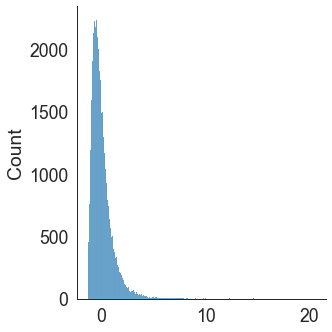

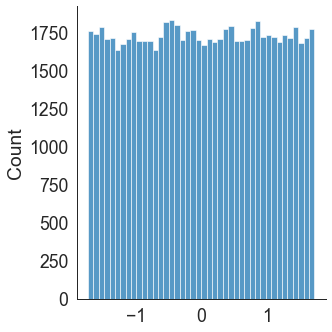

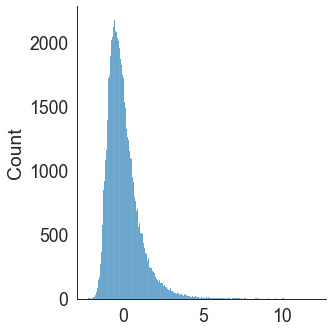

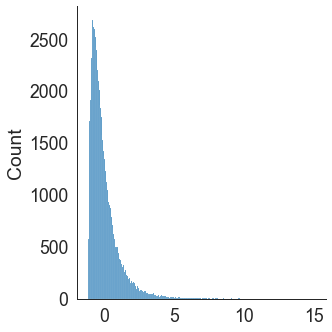

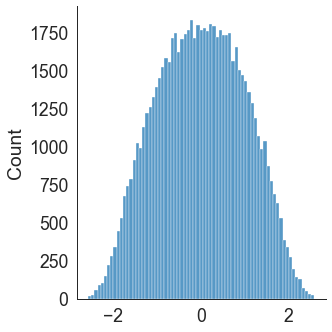

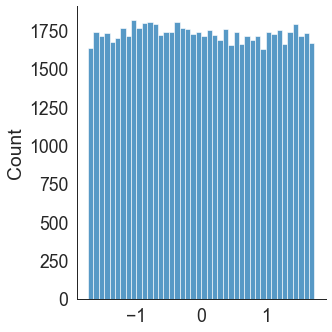

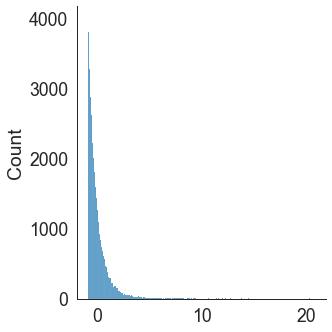

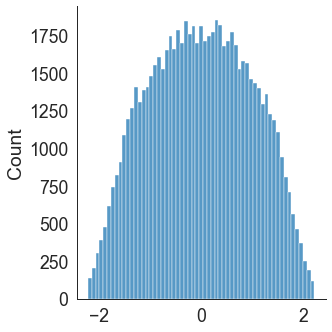

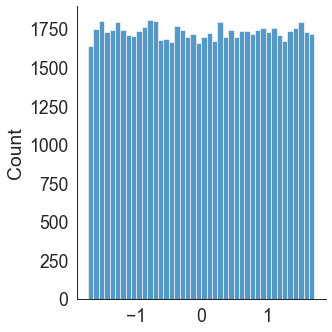

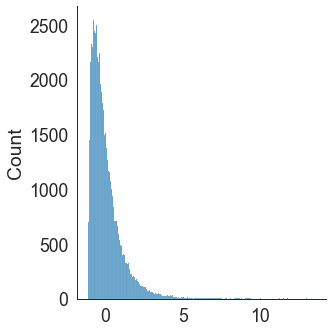

In [14]:
import seaborn as sns
tX_list, ids_list = separate_dataset(tX, ids)

for indexX, column in enumerate(tX_list[2].T):
    sns.displot(column)

In [45]:
#Check data
tX_list, ids_list = separate_dataset(tX, ids)
index=[]
for seT in range(len(tX_list)):
    for indexX, column in enumerate(tX_list[seT].T):
        x_= np.mean(column)
        for indexY, column2 in enumerate(tX_list[seT].T):
            y_= np.mean(column2)
            num=np.dot((column - x_),(column2 - y_))
            den= np.sqrt(np.dot(column - x_,column - x_)*np.dot(column2 - y_,column2 - y_))
            corr= num/den
            if corr> 0.8 and indexX!= indexY and indexX< indexY:
                index.append([seT,indexX, indexY])

print(index)
      
for i in range(3):
    if i==0:
        tX_list[i]=np.delete(tX_list[i], [5,9], axis=1)
        print(tX_list[i].shape)
    if i==1:
        tX_list[i]=np.delete(tX_list[i], [2,6,18,21], axis=1)
        print(tX_list[i].shape)
    if i==2:
        tX_list[i]=np.delete(tX_list[i], [2,9,5,21,22,28], axis=1)
        print(tX_list[i].shape)


/var/folders/n2/lkxf5xgn5qd0l88pblwqxc6h0000gn/T/ipykernel_37732/1938088011.py:11: RuntimeWarning: invalid value encountered in double_scalars
  corr= num/den


[[0, 3, 5], [0, 6, 9], [1, 0, 2], [1, 3, 6], [1, 3, 18], [1, 3, 21], [1, 6, 18], [1, 6, 21], [1, 18, 21], [2, 0, 2], [2, 3, 9], [2, 4, 5], [2, 9, 21], [2, 9, 22], [2, 9, 28], [2, 21, 28], [2, 22, 28]]


In [49]:
# Ridge regression with K-fold
k_fold= 4
degrees = range(1, 3)
lambdas = np.logspace(-4, 0, 30)
seed = 1
#ratio_train = 0.7

rmse_te = 0
BestDeg=0
BestLambda=0
#x_tr, x_te, y_tr, y_te= split_data(tX, y, ratio_train, seed)
k_indices =build_k_indices(y, k_fold, seed)
rmse_te_tmp = []
BestLambdaForDeg=[]
for index_degree, degree in enumerate(degrees):
    rmse_te_tmp2 = []
    for index_lambda, lambda_ in enumerate(lambdas):
        loss_te_tmp=0
        for k in range(k_fold):
            _, loss_te, w=cross_validation(y, tX, k_indices, k, lambda_, degree)
            loss_te_tmp= loss_te_tmp+loss_te
        loss_te_tmp=loss_te_tmp/k_fold
        rmse_te_tmp2.append(np.sqrt(2*loss_te_tmp))
    rmse_te_tmp.append(min(rmse_te_tmp2))
    BestLambdaForDeg.append(lambdas[np.argmin(rmse_te_tmp2)])
BestDeg=degrees[np.argmin(rmse_te_tmp)]
BestLambda= BestLambdaForDeg[np.argmin(rmse_te_tmp)]
rmse_te=min(rmse_te_tmp)


loss=rmse_te
print(BestDeg)
print(BestLambda)


TypeError: build_k_indices() takes 2 positional arguments but 3 were given

In [ ]:
# Least squares regression using normal equation
weight, loss = least_squares(y, tX)
loss

0.33968680947709307

In [104]:
# Ridge regression using normal equations
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
lambda_ = BestLambda
tx=build_poly(tX,BestDeg)

weights, loss = ridge_regression(y, tx, lambda_)

loss

0.33944686042508954

In [14]:
#Importation of train and test data:

from proj1_helpers import *
from implementations import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

#Separate Data Set
from implementations import *

tX_list, ids_list, y_list = separate_dataset(tX, ids, y)
tX_test_list, ids_test_list = separate_dataset(tX_test, ids_test)



#Grid Search of param
function = ridge_regression
degree_vec = []
lambda_vec = []
for i in range(3):
    print('Dataset part {l}:'.format(l = i))
    rmse_te, BestDeg, BestLambda = grid_search(y_list[i], tX_list[i], function, True)
    degree_vec.append(BestDeg)
    lambda_vec.append(BestLambda)
    print('     Best degree: {d}'.format(d = BestDeg))
    print('     Best lambda: {m}'.format(m = BestLambda))
    print('     Loss: {lo}'.format(lo = rmse_te))



#Training
weights_list = []
loss_list = []
mat_tX_test_list = []

for i in range(3):
    mat_tX, mat_tX_test = build_poly_log(tX_list[i], degree_vec[i], True, tX_test_list[i])
    w, l = ridge_regression(y_list[i], mat_tX, lambda_vec[i])
    weights_list.append(w)
    loss_list.append(l)
    mat_tX_test_list.append(mat_tX_test)
    

Dataset part 0:


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


     Best degree: 1
     Best lambda: 0.0008733261623828437
     Loss: 0.7380547288266697
Dataset part 1:
     Best degree: 5
     Best lambda: 0.024118646996409948
     Loss: 0.8058598609702398
Dataset part 2:
     Best degree: 4
     Best lambda: 0.005817091329374358
     Loss: 0.7826367955518109


In [6]:
from proj1_helpers import *
from implementations import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

#Separate Data Set
from implementations import *

tX_list, ids_list, y_list = separate_dataset(tX, ids, y)
tX_test_list, ids_test_list = separate_dataset(tX_test, ids_test)

degree_vec = []
lambda_vec = []
gamma_vec = []
for i in range(3):
    print('Dataset part {l}:'.format(l = i))
    rmse_te, BestDeg, BestLambda, BestGamma = grid_search_for_log_reg(y_list[i], tX_list[i], False)
    degree_vec.append(BestDeg)
    lambda_vec.append(BestLambda)
    gamma_vec.append(BestGamma)
    print('     Best degree: {d}'.format(d = BestDeg))
    print('     Best lambda: {m}'.format(m = BestLambda))
    print('     Best gamma: {g}'.format(g = BestGamma))
    print('     Loss: {lo}'.format(lo = rmse_te))

weights_list = []
loss_list = []
mat_tX_test_list = []
max_iter= 10000


for i in range(3):
    mat_tX, mat_tX_test = build_poly_log(tX_list[i], degree_vec[i], False, tX_test_list[i])
    initial_w = np.zeros((mat_tX.shape[1], 1))
    l, w = logistic_regression_penalized_gradient_descent(y_list[i], mat_tX, initial_w, max_iter, gamma_vec[i], lambda_vec[i])
    weights_list.append(w)
    loss_list.append(l)
    mat_tX_test_list.append(mat_tX_test)

Dataset part 0:
Done Lambda
Done Lambda
Done Lambda
Done Lambda
Done Lambda


KeyboardInterrupt: 

In [17]:
#Log Reg Pen


from proj1_helpers import *
from implementations import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

print("Data loaded")


#Separate Data Set
from implementations import *

tX_list, ids_list, y_list = separate_dataset(tX, ids, y)
tX_test_list, ids_test_list = separate_dataset(tX_test, ids_test)
print("Data separated")

degree_vec = [1 , 4 , 5]
lambda_vec = [1e-05 , 1e-04 , 1e-04]
gamma_vec = [8.65e-10 , 1.9e-9, 1e-9]

weights_list = []
loss_list = []
mat_tX_test_list = []
max_iter= 10000

for i in range(3):
    print("loop")
    mat_tX, mat_tX_test = build_poly_log(tX_list[i], degree_vec[i], False, tX_test_list[i])
    initial_w = np.zeros((mat_tX.shape[1], 1))
    l, w = logistic_regression_penalized_gradient_descent(y_list[i], mat_tX, initial_w, max_iter, gamma_vec[i], lambda_vec[i])
    print(l)
    weights_list.append(w)
    loss_list.append(l)
    mat_tX_test_list.append(mat_tX_test)

Data loaded
Data separated
loop
-64730.23741869711
loop
-63383.06999684557
loop
-181.017636445889


## Generate predictions and save ouput in csv format for submission:

In [105]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test_poly=build_poly(tX_test,BestDeg)

In [106]:
OUTPUT_PATH = 'result.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test_poly)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [18]:
#Submission with separate data, grid search and ridge of log

OUTPUT_PATH = 'result.csv' # TODO: fill in desired name of output file for submission

# mat_tX_test_list = build_poly_separated(tX_test_list, 3)            #data augmentation
y_pred_list = separated_eval(weights_list, mat_tX_test_list)        #prediction

y_pred = np.concatenate((y_pred_list[0], y_pred_list[1], y_pred_list[2]))
ids_test_sub = np.concatenate((ids_test_list[0], ids_test_list[1], ids_test_list[2]))

create_csv_submission(ids_test_sub, y_pred, OUTPUT_PATH)